# The Single Neuron Linear Regression Model
## In this notebook, we will focus on linear regression. 
### First, we are gonna load necessary libraries and our dataset.

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
sns.set_theme()

df = pd.read_csv("cancer_reg.csv")

### Then, let's check our dataset.

In [89]:
df.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


### According to the table above, we can see there are total 32 numeric variables in this dataset. And we will use 'target_deathrate' as our response variable.

### Before doing any work, we need to deal with missing value and non-numeric variable. 

In [90]:
df.isna().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarri

### According to the result, there are missing values in 'pctsomecol18_24', 'pctemployed16_over' and 'pctprivatecoveragealone'. Because there are so many missing values in 'pctsomecol18_24' and 'pctprivatecoveragealone', so we consider deleting the 2 variables. Besides, we will delete rows where there are missing values of 'pctemployed16_over'.

In [100]:
df=df.drop(df[df['pctemployed16_over'].isnull()].index)
y = df['target_deathrate']
columns_to_drop = ["target_deathrate", "pctsomecol18_24", "pctprivatecoveragealone","binnedinc","geography"]
X = df.drop(columns=columns_to_drop)
X.shape

avganncount               0
avgdeathsperyear          0
incidencerate             0
medincome                 0
popest2015                0
povertypercent            0
studypercap               0
medianage                 0
medianagemale             0
medianagefemale           0
percentmarried            0
pctnohs18_24              0
pcths18_24                0
pctbachdeg18_24           0
pcths25_over              0
pctbachdeg25_over         0
pctemployed16_over        0
pctunemployed16_over      0
pctprivatecoverage        0
pctempprivcoverage        0
pctpubliccoverage         0
pctpubliccoveragealone    0
pctwhite                  0
pctblack                  0
pctasian                  0
pctotherrace              0
pctmarriedhouseholds      0
birthrate                 0
dtype: int64

### After dealing with missing values, I will seperate the dataset as training dataset and testing dataset.

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Then, using training dataset to build linear regression model.

In [93]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)


LinearRegression()

### Let's check the result. More importantly, check the precision of the linear regression model.

Mean Squared Error: 340.90361081342854
R-squared: 0.5567053384700541


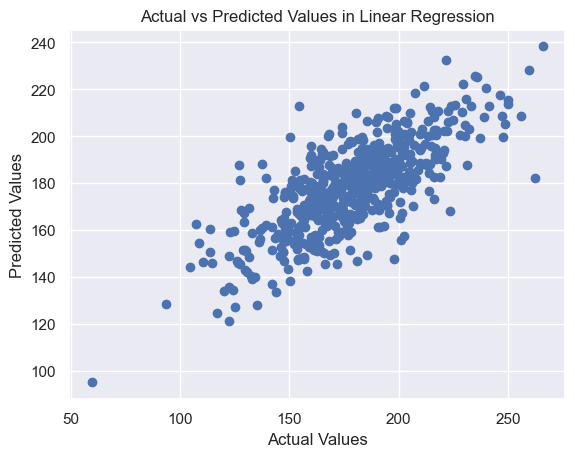

In [94]:
y_pred0=model.predict(X_train)
y_pred1 = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values in Linear Regression')
plt.show()


### According to the result(R-Square), this modle can explain about 55% of actual data. It is not very good. Then, I will try to build a Single Neuron Linear Regression Model by using the dataset.


In [103]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                errors += .5*(error**2)
            self.errors_.append(errors/N)
         
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

Mean Squared Error: 882.1485463872942


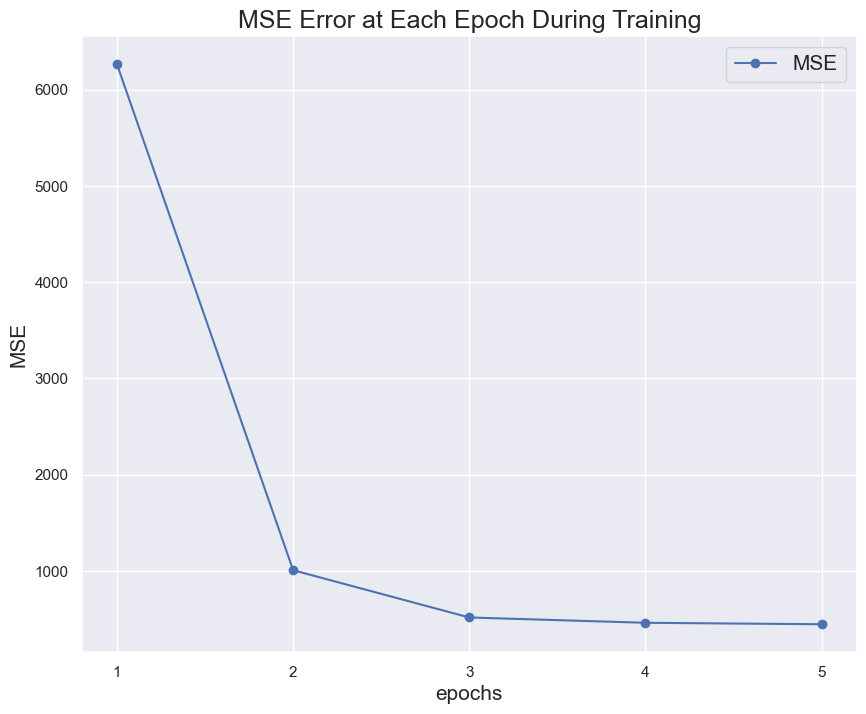

In [106]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X_train_scaled, y_train, alpha = 0.0001, epochs = 5)
y_hat=node.predict(X_train_scaled)
mse = np.mean((y_train - y_hat)**2)
print(f"Mean Squared Error: {mse}")

plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

### According to the MSE plot, at the 5th epoch, the mse is the smallest. But it is also a large number. What about in testing dataset?

In [109]:
scaler = MinMaxScaler()
X_test_scaled = scaler.fit_transform(X_test)
y_hat1=node.predict(X_test_scaled)
mse1 = np.mean((y_test - y_hat1)**2)
print(f"Mean Squared Error: {mse1}")

Mean Squared Error: 1032.901992973147


### In testing dataset, it gives a larger mse. That is to say, using linear regression model to predict 'target_deathrate' is not appropriate.